In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import os
from typing import Dict
import pickle


def set_default_plot_style():
    plt.style.use("default")  # start clean

    plt.rcParams["axes.grid"] = True
    plt.rcParams["grid.alpha"] = 0.2
    plt.rcParams["grid.linestyle"] = "-"
    plt.rcParams["grid.color"] = "gray"

    plt.rcParams["axes.spines.top"] = False
    plt.rcParams["axes.spines.right"] = False

    plt.rcParams["axes.linewidth"] = 1.2

    plt.rcParams["legend.frameon"] = False

    plt.rcParams["font.size"] = 16
    plt.rcParams["axes.labelsize"] = 24
    plt.rcParams["legend.fontsize"] = 18

    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = ['Computer Modern Roman']

# Call once at the top of your script
set_default_plot_style()


In [56]:
# Helpful funcs
def log_b(x, b):
    return np.log(x) / np.log(b)


In [42]:
L_vals = [16000]

epsilon_prime_c = 0.287808
epsilon_prime_vals = [epsilon_prime_c - 0.0002, epsilon_prime_c - 0.0001, epsilon_prime_c, epsilon_prime_c + 0.0001, epsilon_prime_c + 0.0002]

time_prefact = 50

num_initial_conds = 2000
initial_state_prob = 0.5

delta_vals = [0.1]

time_step = 10


cmap = plt.colormaps.get_cmap("Oranges").resampled(len(epsilon_prime_vals) + 5)


In [43]:
# If first time

collected_rhos = {}
collected_rho_stds = {}

for L_val in L_vals:
    print(f"L_val: {L_val}")

    T_f = L_val*time_prefact
    collected_rhos[L_val] = {}
    collected_rho_stds[L_val] = {}

    for delta_val in delta_vals:
        print(f"L_val: {L_val} | delta: {delta_val}")
        delta_val_name = f"{delta_val}".replace(".", "p")

        collected_rhos[L_val][delta_val] = {}
        collected_rho_stds[L_val][delta_val] = {}

        for epsilon_prime in epsilon_prime_vals:
            print(f"L_val: {L_val} | delta: {delta_val} | epsilon: {epsilon_prime}")
            epsilon_val_name = f"{epsilon_prime}".replace(".", "p")

            current_rhos = np.array([[0.0 for _ in range(L_val * time_prefact // time_step)] for _ in range(num_initial_conds)])
            for init_cond in range(1, num_initial_conds+1):
                sample_filepath_name = f"data/time_rand_delta/rho_per_time/IC1/L{L_val}/delta{delta_val_name}/IC1_L{L_val}_epsilon{epsilon_val_name}_timepref{time_prefact}_sample{init_cond}.csv"
                df = pd.read_csv(sample_filepath_name)

                current_rhos[init_cond-1] = df.rho
            
            collected_rhos[L_val][delta_val][epsilon_prime] = np.mean(current_rhos.T, axis=1)
            collected_rho_stds[L_val][delta_val][epsilon_prime] = np.std(current_rhos.T, axis=1)

            pickle_path = f"data/time_rand_delta/rho_per_time/IC{num_initial_conds}/L{L_val}/delta{delta_val_name}/IC{num_initial_conds}_L{L_val}_epsilon{epsilon_val_name}_timepref{time_prefact}"
            dir_path = os.path.dirname(pickle_path)
            os.makedirs(dir_path, exist_ok=True)
            
            with open(pickle_path + "mean.pickle", "wb") as f:
                pickle.dump(collected_rhos[L_val][delta_val][epsilon_prime], f)
            with open(pickle_path + "stds.pickle", "wb") as f:
                pickle.dump(collected_rho_stds[L_val][delta_val][epsilon_prime], f)

L_val: 16000
L_val: 16000 | delta: 0.1
L_val: 16000 | delta: 0.1 | epsilon: 0.28760800000000003
L_val: 16000 | delta: 0.1 | epsilon: 0.287708
L_val: 16000 | delta: 0.1 | epsilon: 0.287808
L_val: 16000 | delta: 0.1 | epsilon: 0.287908
L_val: 16000 | delta: 0.1 | epsilon: 0.288008


## If you have already processed and saved the data as pickled

In [45]:

collected_rhos = {}
collected_rho_stds = {}

for L_val in L_vals:
    print(f"L_val: {L_val}")

    T_f = L_val*time_prefact
    collected_rhos[L_val] = {}
    collected_rho_stds[L_val] = {}

    for delta_val in delta_vals:
        print(f"L_val: {L_val} | delta: {delta_val}")
        delta_val_name = f"{delta_val}".replace(".", "p")

        collected_rhos[L_val][delta_val] = {}
        collected_rho_stds[L_val][delta_val] = {}
        for epsilon_prime in epsilon_prime_vals:
            epsilon_val_name = f"{epsilon_prime}".replace(".", "p")
            pickle_path = f"data/time_rand_delta/rho_per_time/IC{num_initial_conds}/L{L_val}/delta{delta_val_name}/IC{num_initial_conds}_L{L_val}_epsilon{epsilon_val_name}_timepref{time_prefact}"
            
            with open(pickle_path + "mean.pickle", "rb") as f:
                collected_rhos[L_val][delta_val][epsilon_prime] = pickle.load(f)
            with open(pickle_path + "stds.pickle", "rb") as f:
                collected_rho_stds[L_val][delta_val][epsilon_prime] = pickle.load(f)

L_val: 16000
L_val: 16000 | delta: 0.1


In [46]:
collected_rhos[L_vals[0]][delta_vals[0]][epsilon_prime_vals[0]] == collected_rhos[L_vals[0]][delta_vals[0]][epsilon_prime_vals[1]]

array([False, False, False, ..., False, False, False], shape=(80000,))

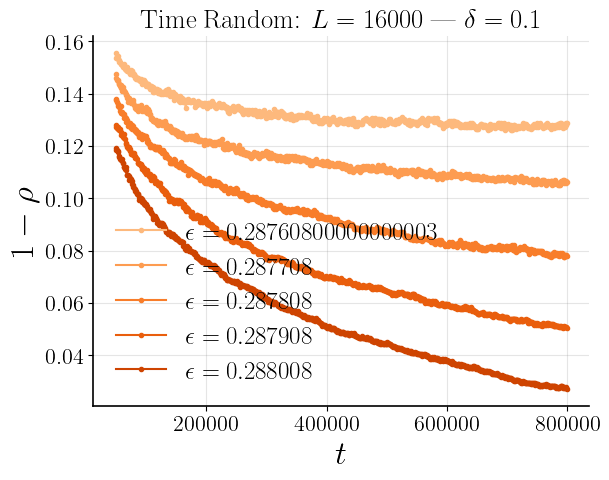

In [52]:

for j, L in enumerate(L_vals):
    for delta_val in delta_vals:
        delta_val_name = f"{delta_val}".replace(".", "p")
        for i, epsilon_val in enumerate(epsilon_prime_vals):
            c = cmap(i+3)
            time_vals = [i * time_step for i in range(0, L*time_prefact // time_step)]
            plt.plot(
                time_vals[5000::100], 
                1-collected_rhos[L][delta_val][epsilon_val][5000::100], 
                label = fr"$\epsilon = {epsilon_val}$",
                # fmt='--',  
                markersize=3,
                marker = "o",
                # capsize=3,
                c=c
                )
                
            # plt.axvline(0.29450750, c = 'k', label=f"x = 0.29450750 (old trans)")
            plt.title(fr"Time Random: $L = {L}$ | $\delta = {delta_val}$")
            plt.xlabel(r"$t$")
            plt.ylabel(r"$1 - \rho$")
            plt.legend()

        plt.show()


/var/folders/0k/n4x5z88x1rx124p1g1l55hmc0000gn/T/ipykernel_74527/1691084724.py:13: RuntimeWarning: divide by zero encountered in divide
  (1/np.array(time_vals))[:],


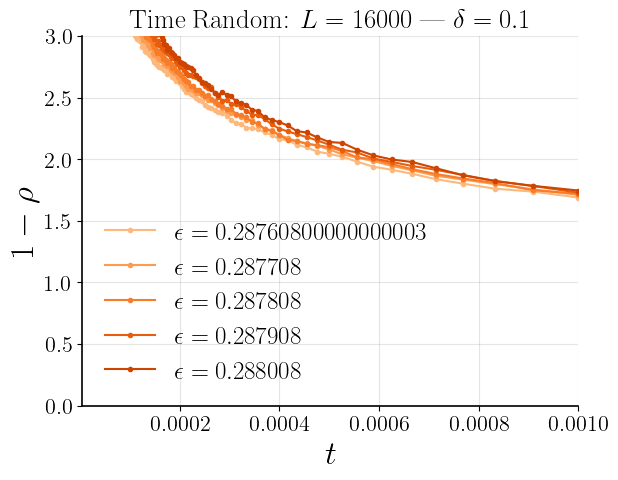

In [74]:
b = 10
for j, L in enumerate(L_vals):
    for delta_val in delta_vals:
        delta_val_name = f"{delta_val}".replace(".", "p")
        for i, epsilon_val in enumerate(epsilon_prime_vals):
            c = cmap(i+3)
            time_vals = [i * time_step*time_step for i in range(0, L*time_prefact // (time_step * time_step))]
            data_to_plot = 1-collected_rhos[L][delta_val][epsilon_val]
            data_to_plot_numerator = log_b(np.array([data_to_plot[(i*time_step)//b] for i in range(0, len(data_to_plot))]), 10)
            data_to_plot_denomenator = np.array([data_to_plot[i*time_step] for i in range(0, len(data_to_plot)//time_step)])
            data_to_plot = data_to_plot_numerator[:len(data_to_plot_denomenator)]/data_to_plot_denomenator
            plt.plot(
                (1/np.array(time_vals))[:], 
                -data_to_plot[:], 
                label = fr"$\epsilon = {epsilon_val}$",
                # fmt='--',  
                markersize=3,
                marker = "o",
                # capsize=3,
                c=c
                )
                
        # plt.axvline(0.29450750, c = 'k', label=f"x = 0.29450750 (old trans)")
        plt.title(fr"Time Random: $L = {L}$ | $\delta = {delta_val}$")
        plt.xlabel(r"$t$")
        plt.ylabel(r"$1 - \rho$")
        plt.legend()
        plt.xlim((0.000005, 0.001))
        plt.ylim((0, 3))

        plt.show()

# By hand collpase
The expected form (near the crit pt) is

$(1-\rho)t^{\beta/\nu_{\|}} \sim g(t^{-z})$